In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [9]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [10]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-26 20:46:39.781243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750970800.075088      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750970800.180430      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-26 20:46:55.418177: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7131 - loss: 0.5986 - val_accuracy: 0.8012 - val_loss: 0.4624
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4584 - val_accuracy: 0.8131 - val_loss: 0.4238
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.4315 - val_accuracy: 0.8219 - val_loss: 0.4076
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8223 - loss: 0.4161 - val_accuracy: 0.8244 - val_loss: 0.3964
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.3996 - val_accuracy: 0.8269 - val_loss: 0.3877
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3825 - val_accuracy: 0.8338 - val_loss: 0.3799
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.3749 - val_accuracy: 0.8406 - val_loss: 0.3719
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8464 - loss: 0.3687 - val_accu

In [21]:
model.layers[0].get_weights()

[array([[-3.55314881e-01, -1.46321645e-02,  2.74616271e-01,
          7.65613317e-02,  3.58691365e-02, -6.69496283e-02,
         -1.52961820e-01, -1.58815324e-01, -1.35185551e-02,
         -1.43532589e-01,  6.32137507e-02],
        [ 1.90876111e-01, -2.03548387e-01, -3.72108549e-01,
          2.93276042e-01, -6.94205225e-01, -4.16935951e-01,
          9.64848220e-01, -8.15917850e-01,  2.90341884e-01,
         -2.21749574e-01, -2.00921252e-01],
        [-2.98009932e-01, -2.61422664e-01,  5.69107652e-01,
          3.77641916e-01,  4.29158658e-01, -1.05273649e-01,
          2.28450708e-02, -6.92983270e-02,  1.94085333e-02,
         -2.79198617e-01,  1.47572041e-01],
        [ 7.55024433e-01,  3.37449551e-01,  1.49706706e-01,
          2.57926017e-01,  5.24981380e-01, -1.70334518e-01,
          1.99122354e-01,  3.46512645e-01, -1.24748275e-01,
          1.77168325e-01,  4.20043975e-01],
        [ 8.28265071e-01,  7.59762168e-01, -1.44558534e-01,
          8.75138521e-01, -4.88453239e-01,  

In [22]:
model.layers[1].get_weights()

[array([[ 0.34965256, -0.00406198,  0.3902378 , -0.10550705, -0.4665263 ,
          0.3373307 , -0.33510476, -0.1343274 , -1.0927052 ,  0.28843543,
          0.6164405 ],
        [ 0.55910295, -0.71444875,  0.11401854, -0.3072033 ,  0.36143893,
          0.03148425, -2.469541  , -0.07288101,  0.208348  , -0.38214314,
          0.88645095],
        [ 0.63939005, -0.8927886 , -0.3439302 ,  0.17751853,  0.24323477,
         -0.02497542, -0.4452786 ,  0.27515742,  0.04824175,  0.12895018,
          0.58309114],
        [ 0.02981662, -0.5680968 ,  0.5410892 , -0.09443857, -0.14986633,
         -0.38295624, -0.05043043, -0.24731886,  0.37444925,  0.16258395,
          0.19738184],
        [-0.03858864, -0.04680433, -0.02247234, -0.20189284, -0.6690631 ,
          0.10820045,  0.592052  ,  0.15261729,  0.1855298 ,  0.04875548,
         -0.15899016],
        [ 0.6342847 ,  0.04633237,  0.21969716,  0.22619493,  0.0241511 ,
         -0.1651946 ,  0.02445387,  0.6391657 , -0.8469928 , -0.0440757

In [23]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred=np.where(y_log>0.5,1,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8555

In [26]:
import matplotlib.pyplot as plt

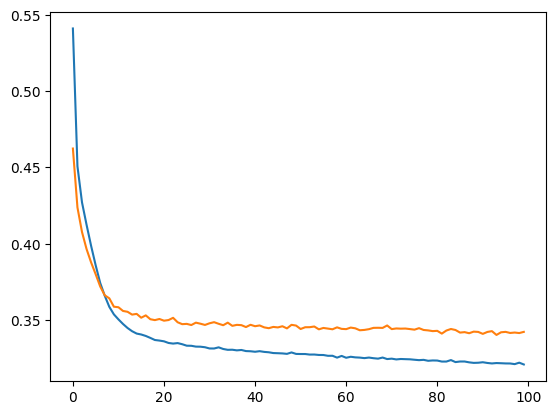

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

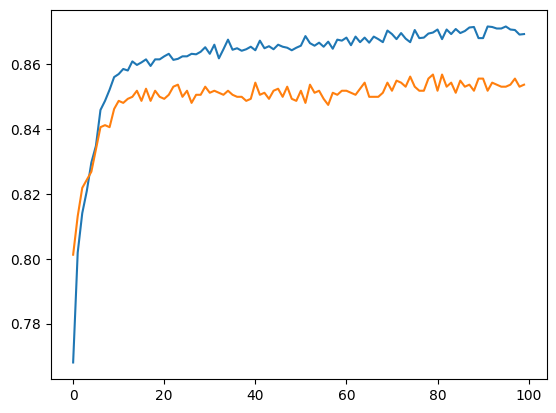

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])